<a href="https://www.kaggle.com/code/mayarmohamedswilam/notebook718b31abd1?scriptVersionId=140608402" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-debt-data/bank_data.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = "/kaggle/input/bank-debt-data/bank_data.csv"
df = pd.read_csv(data_path)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
print(df.head())

     id  expected_recovery_amount  actual_recovery_amount recovery_strategy  \
0  2030                       194                 263.540  Level 0 Recovery   
1  1150                       486                 416.090  Level 0 Recovery   
2   380                       527                 429.350  Level 0 Recovery   
3  1838                       536                 296.990  Level 0 Recovery   
4  1995                       541                 346.385  Level 0 Recovery   

   age     sex  
0   19    Male  
1   25  Female  
2   27    Male  
3   25    Male  
4   34    Male  


In [4]:
# Drop rows with missing values
df_cleaned = df.dropna()

# Impute missing values with mean or median
df['expected_recovery_amount'].fillna(df['expected_recovery_amount'].median(), inplace=True)


In [5]:
df['sex'].fillna(df['sex'].mode(), inplace=True)

In [6]:
df['age'].fillna(df['age'].median(), inplace=True)

In [7]:
df['id'].fillna(df['id'].min(), inplace=True)

In [8]:
df['actual_recovery_amount'].fillna(df['actual_recovery_amount'].max(), inplace=True)

In [9]:
print(df.describe())

                id  expected_recovery_amount  actual_recovery_amount  \
count  1882.000000               1882.000000             1882.000000   
mean   1035.596174               2759.967588             4000.967837   
std     591.458429               2019.826565             4576.506350   
min       6.000000                194.000000              200.425000   
25%     534.250000               1261.250000             1045.190300   
50%    1029.500000               2062.000000             2115.446373   
75%    1551.750000               3569.500000             5417.237207   
max    2056.000000               9964.000000            34398.479710   

               age  
count  1882.000000  
mean     39.650372  
std      15.453072  
min      18.000000  
25%      28.000000  
50%      35.000000  
75%      50.000000  
max      84.000000  


In [10]:
print(df.isnull().sum())

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64


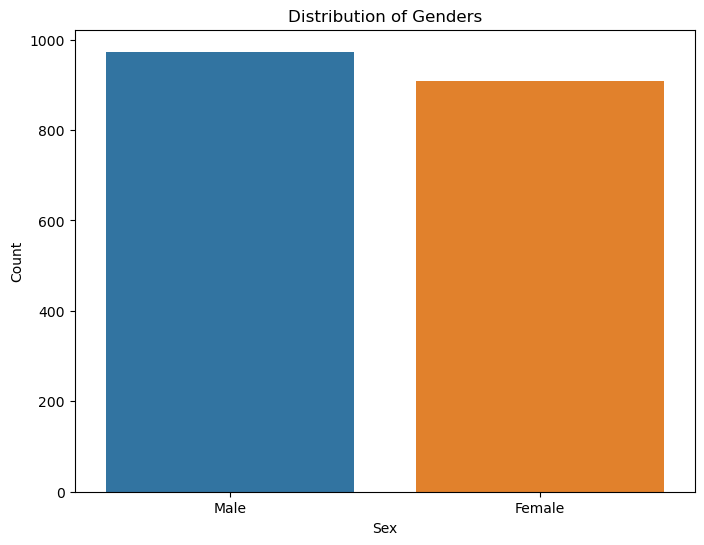

In [11]:
# Create a bar plot to show the distribution of genders
plt.figure(figsize=(8, 6))
sns.countplot(x="sex", data=df)
plt.title("Distribution of Genders")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()



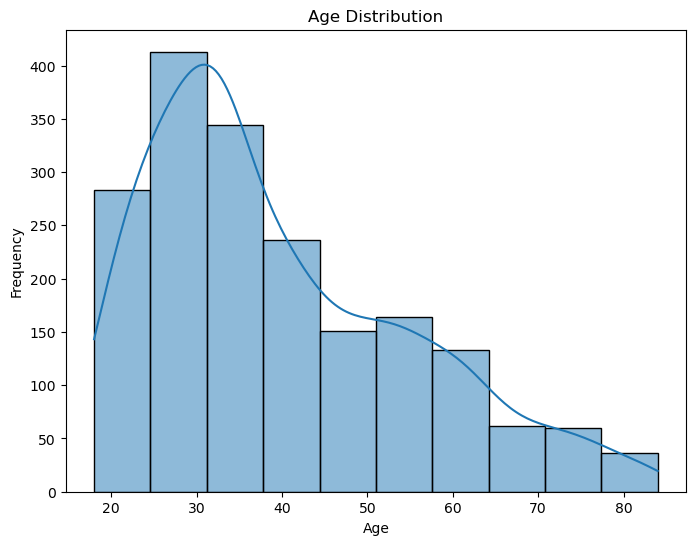

In [12]:
# Create a histogram to show the age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df["age"], bins=10, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

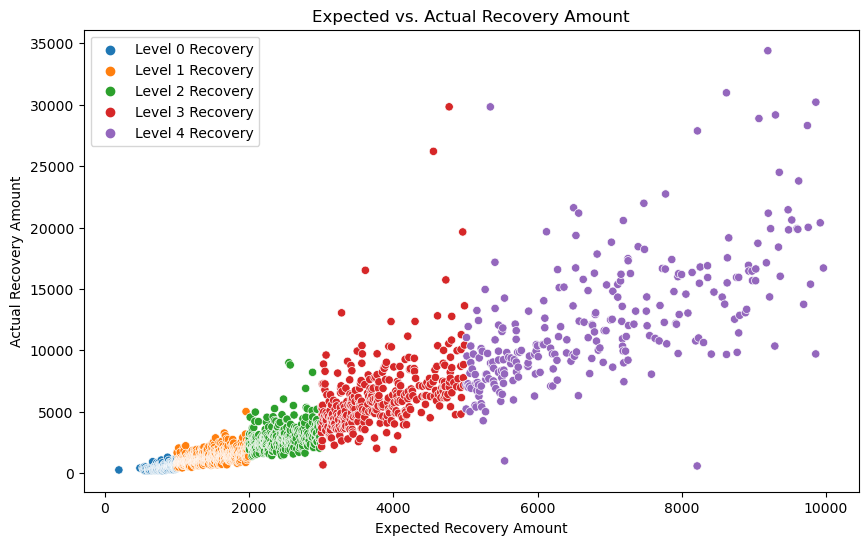

In [13]:
# Visualize expected recovery amount vs. actual recovery amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x="expected_recovery_amount", y="actual_recovery_amount", data=df, hue="recovery_strategy")
plt.title("Expected vs. Actual Recovery Amount")
plt.xlabel("Expected Recovery Amount")
plt.ylabel("Actual Recovery Amount")
plt.legend()
plt.show()

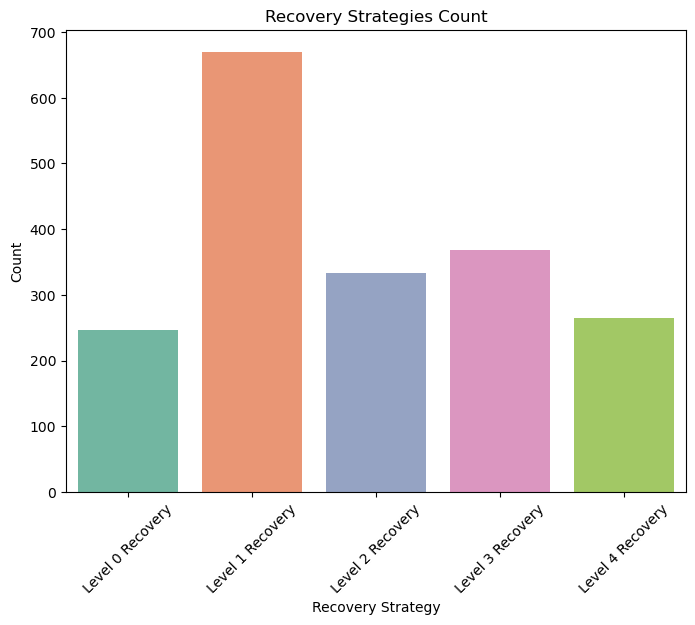

In [14]:
# Visualize recovery strategies count
plt.figure(figsize=(8, 6))
sns.countplot(x="recovery_strategy", data=df, palette="Set2")
plt.title("Recovery Strategies Count")
plt.xlabel("Recovery Strategy")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

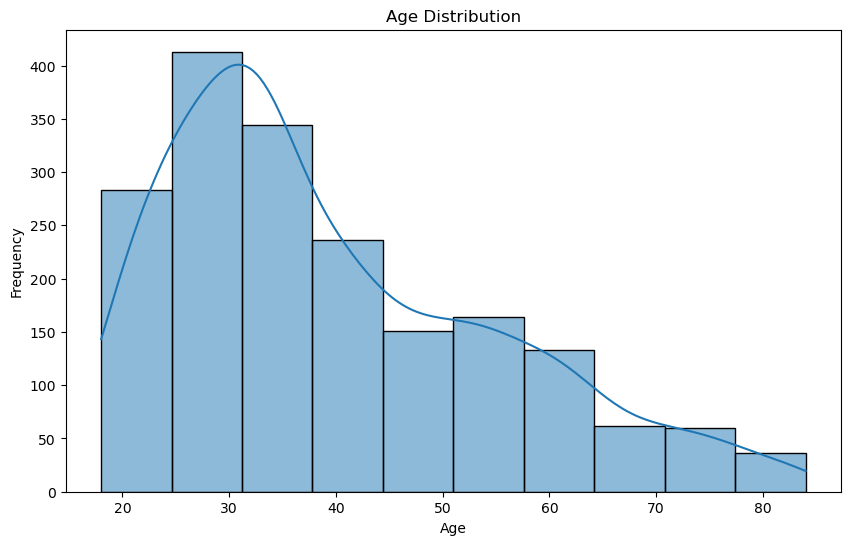

In [15]:
# Visualize age distribution with a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="age", bins=10, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

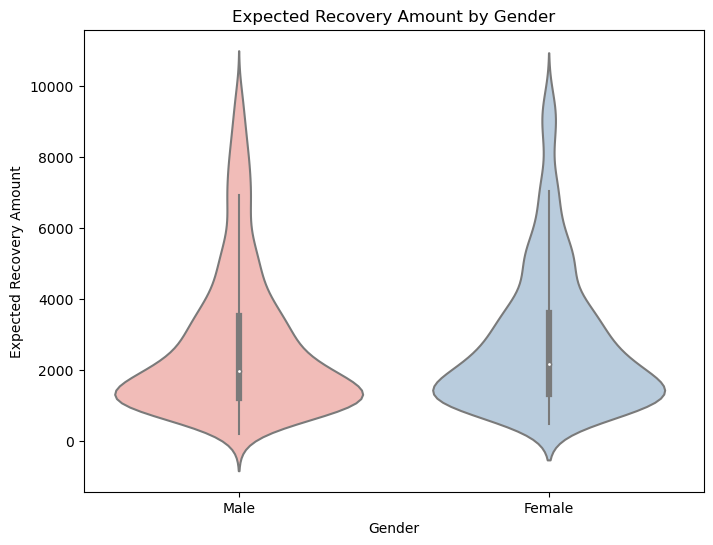

In [16]:
# Visualize a violin plot of expected recovery amount by gender
plt.figure(figsize=(8, 6))
sns.violinplot(x="sex", y="expected_recovery_amount", data=df, palette="Pastel1")
plt.title("Expected Recovery Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Expected Recovery Amount")
plt.show()

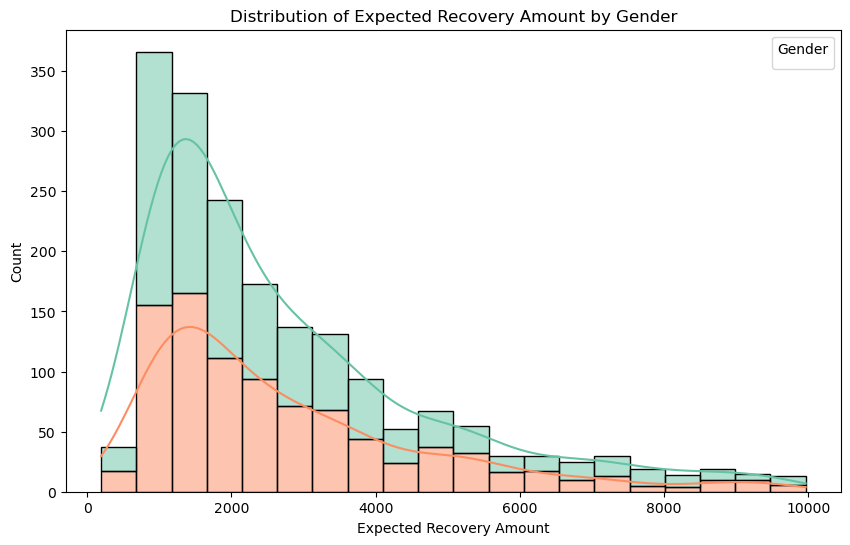

In [17]:
# Visualize the distribution of expected recovery amount with a kernel density estimate
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="expected_recovery_amount", hue="sex", multiple="stack", bins=20, kde=True, palette="Set2")
plt.title("Distribution of Expected Recovery Amount by Gender")
plt.xlabel("Expected Recovery Amount")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

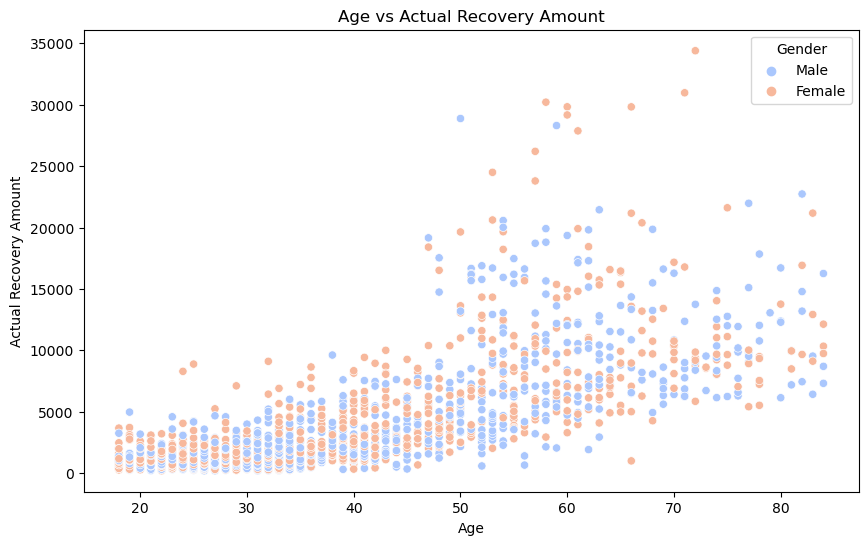

In [18]:
# Create a scatter plot to show the relationship between age and actual recovery amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x="age", y="actual_recovery_amount", data=df, hue="sex", palette="coolwarm")
plt.title("Age vs Actual Recovery Amount")
plt.xlabel("Age")
plt.ylabel("Actual Recovery Amount")
plt.legend(title="Gender")
plt.show()

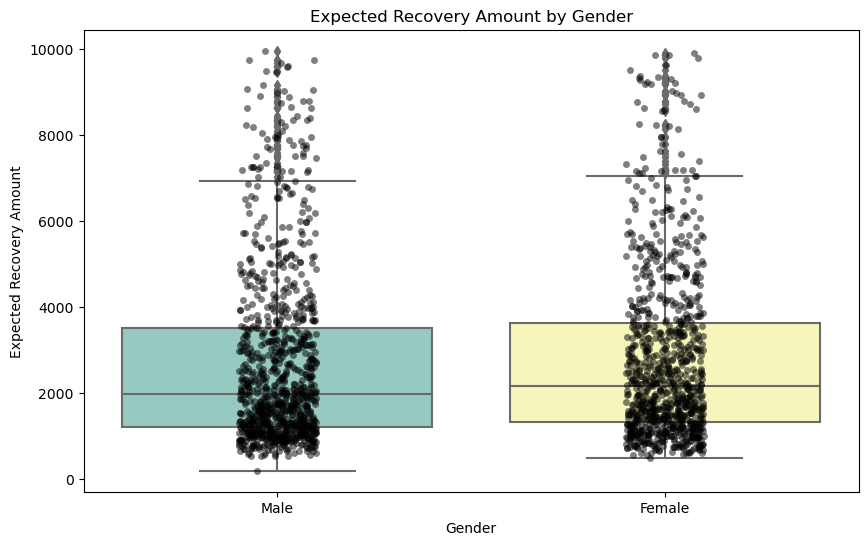

In [19]:
# Visualize a box plot of expected recovery amount by gender with individual data points
plt.figure(figsize=(10, 6))
sns.boxplot(x="sex", y="expected_recovery_amount", data=df, palette="Set3")
sns.stripplot(x="sex", y="expected_recovery_amount", data=df, jitter=True, color="black", alpha=0.5)
plt.title("Expected Recovery Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Expected Recovery Amount")
plt.show()